In [50]:

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor


import joblib
from joblib import dump, load

## **EDA & DATA ENGINEERING**

In [51]:
pricing_df = pd.read_csv('https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv')
pricing_df.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [52]:

# Basics Statistics

print("Number of rows : {}".format(pricing_df.shape[0]))
print()

print("Number of columns : {}".format(pricing_df.shape[1]))
print()

print("Percentage of missing values: ")
display(100*pricing_df.isnull().sum()/pricing_df.shape[0])

print("Basics statistics: ")
data_desc = pricing_df.describe(include='all')
display(data_desc)
print()



Number of rows : 4843

Number of columns : 15

Percentage of missing values: 


,0
Unnamed: 0,0.0
model_key,0.0
mileage,0.0
engine_power,0.0
fuel,0.0
paint_color,0.0
car_type,0.0
private_parking_available,0.0
has_gps,0.0
has_air_conditioning,0.0


Basics statistics: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [53]:

pricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4843 non-null   int64 
 1   model_key                  4843 non-null   object
 2   mileage                    4843 non-null   int64 
 3   engine_power               4843 non-null   int64 
 4   fuel                       4843 non-null   object
 5   paint_color                4843 non-null   object
 6   car_type                   4843 non-null   object
 7   private_parking_available  4843 non-null   bool  
 8   has_gps                    4843 non-null   bool  
 9   has_air_conditioning       4843 non-null   bool  
 10  automatic_car              4843 non-null   bool  
 11  has_getaround_connect      4843 non-null   bool  
 12  has_speed_regulator        4843 non-null   bool  
 13  winter_tires               4843 non-null   bool  
 14  rental_p

We can notice a first columns which represents only indexes : it can be dropped

In [54]:
pricing_df.drop(columns=['Unnamed: 0'], inplace=True)

In [55]:
for col in pricing_df.columns:
    print(f"{col} : {pricing_df[col].nunique()}")

model_key : 28
mileage : 4786
engine_power : 61
fuel : 4
paint_color : 10
car_type : 8
private_parking_available : 2
has_gps : 2
has_air_conditioning : 2
automatic_car : 2
has_getaround_connect : 2
has_speed_regulator : 2
winter_tires : 2
rental_price_per_day : 220


In [56]:

#Visualization of the distribution of car models

model_counts = pricing_df['model_key'].value_counts().reset_index()
model_counts.columns = ['model_key', 'count']

# On plotly
fig = px.bar(
    model_counts,
    x='model_key',
    y='count',
    title='Distribution of car models',
    labels={'model_key': 'Model Key', 'count': 'Number'},
    color='count',
    color_continuous_scale='Blues',
    text='count'
)

# Mise en forme
fig.update_layout(
    xaxis_tickangle=45,
    xaxis_title='Model Key',
    yaxis_title='Nombre',
    template='simple_white',
    height=500,
    width=1000
)

fig.show()

In [57]:
# some models are limited in number (for example less than 50)... so that they can be grouped together to make the model more stable
# Group brand cars

model_to_group = model_counts[model_counts['count'] <= 50]['model_key']
pricing_df.loc[pricing_df['model_key'].isin(model_to_group), 'model_key'] = 'Others'
pricing_df["model_key"].value_counts()

,count
model_key,
Citroën,969
Renault,916
BMW,827
Peugeot,642
Audi,526
Nissan,275
Others,242
Mitsubishi,231
Mercedes,97


In [58]:
#what about the other categorical columns?

columns = ['fuel', 'paint_color', 'car_type']


results = {}

for col in columns:
    results[col] = pricing_df[col].value_counts().reset_index()
    results[col].columns = [col, 'count']

# Print the results
for col in columns:
    print(f"\n📊 Distinct values of each categorical column: {col}")
    display(results[col])


📊 Distinct values of each categorical column: fuel


,fuel,count
0,diesel,4641
1,petrol,191
2,hybrid_petrol,8
3,electro,3



📊 Distinct values of each categorical column: paint_color


,paint_color,count
0,black,1633
1,grey,1175
2,blue,710
3,white,538
4,brown,341
5,silver,329
6,red,52
7,beige,41
8,green,18
9,orange,6



📊 Distinct values of each categorical column: car_type


,car_type,count
0,estate,1606
1,sedan,1168
2,suv,1058
3,hatchback,699
4,subcompact,117
5,coupe,104
6,convertible,47
7,van,44


In [59]:
#we notice that the majority of fuel is 'diesel' or petrol'...so we could create a groupe other for the electro and hybrid ones

fuel_to_group=['hybrid_petrol', 'electro']
pricing_df.loc[pricing_df['fuel'].isin(fuel_to_group), 'fuel'] = 'other'
pricing_df["fuel"].value_counts()

,count
fuel,
diesel,4641
petrol,191
other,11


In [60]:
# Preparing data
distribution = pricing_df['has_getaround_connect'].value_counts().sort_index()
df_dist = pd.DataFrame({
    'Connectivity': ['Not Connected', 'Connected'],
    'Amount': distribution.values
})

# Visualisation with Plotly
fig = px.bar(
    df_dist,
    x='Connectivity',
    y='Amount',
    title='Distribution of connected and no connected cars with Getaround',
    color='Connectivity',
    text='Amount',
    color_discrete_map={
        'Connected': 'mediumseagreen',
        'Not Connected': 'salmon'
    }
)

# Mise en forme
fig.update_layout(
    xaxis_title='Type of connectivity',
    yaxis_title='Number of cars',
    template='simple_white',
    width=800,
    height=500
)

fig.show()

In [61]:
fig = px.histogram(
    pricing_df,
    x='rental_price_per_day',
    color='has_getaround_connect',
    nbins=30,
    barmode='overlay',
    labels={
        'rental_price_per_day': 'Price of rent per day (€)',
        'has_getaround_connect': 'Connectivity'
    },
    color_discrete_map={
        0: 'salmon',
        1: 'mediumseagreen'
    },
    title='Distribution dof the price depending on the connectivity Getaround'
)

fig.update_layout(
    xaxis_title='Price of rent per day (€)',
    yaxis_title='Number of cars',
    legend_title='Connected car',
    template='simple_white',
    width=900,
    height=500
)

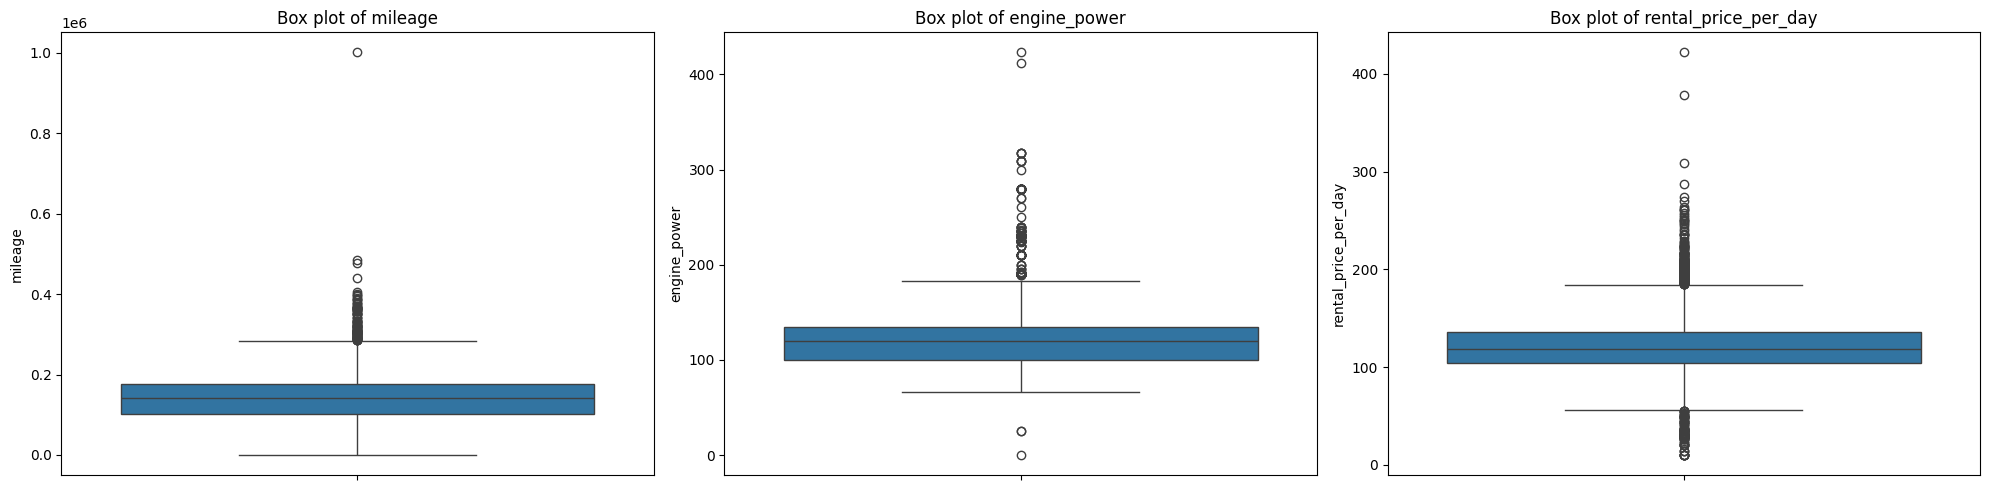

In [62]:
#let's analyse outliers on numerical columns
numerical_columns = ['mileage','engine_power', 'rental_price_per_day']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, feature in enumerate(numerical_columns):
    sns.boxplot(data=pricing_df, y=feature, orient="v", ax=axes[i])
    axes[i].set_title(f'Box plot of {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


--> These plots show outliers on each numeric colums above all on engine power and rental price

In [63]:
#so now we can drop outliers to base our models on right values

for i in pricing_df[numerical_columns]:
    outlier_min = pricing_df[i].mean() - 3*pricing_df[i].std()
    outlier_max = pricing_df[i].mean() + 3*pricing_df[i].std()
    to_keep = (pricing_df[i] > outlier_min) & (pricing_df[i] < outlier_max)
    pricing_df = pricing_df.loc[to_keep,:]

print('Prediction can be made on :', pricing_df.shape[0])


Prediction can be made on : 4705


## **PREPROCESSING**

In [64]:
#Separation of features from the target variable

target = 'rental_price_per_day'

X = pricing_df.drop(columns=[target])
Y = pricing_df[target]

print("Y : ")
print(Y.head())

print("X :")
print(X.head())

Y : 
0    106
2    101
3    158
4    183
5    131
Name: rental_price_per_day, dtype: int64
X :
  model_key  mileage  engine_power    fuel paint_color     car_type  \
0   Citroën   140411           100  diesel       black  convertible   
2   Citroën   183297           120  diesel       white  convertible   
3   Citroën   128035           135  diesel         red  convertible   
4   Citroën    97097           160  diesel      silver  convertible   
5   Citroën   152352           225  petrol       black  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
2                      False    False                 False          False   
3                       True     True                 False          False   
4                       True     True                 False          False   
5                       True     True                 False          False   

   has_ge

In [65]:

# Dividing into train and test sets

print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")

Dividing into train and test sets...
...Done.


In [66]:
#Now let's check outliers on numeric features :
numeric_features = []
categorical_features = []


for column in X.columns:
    if pd.api.types.is_numeric_dtype(X[column]) and not pd.api.types.is_bool_dtype(X[column]):

        numeric_features.append(column)
    else:
        categorical_features.append(column)


print("Numerci Features : ", numeric_features)
print("Categorical features : ", categorical_features)

Numerci Features :  ['mileage', 'engine_power']
Categorical features :  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


In [67]:

# Pipeline for the features


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [68]:
# Initializing the preprocessor for categorical and numerical columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [69]:
# Preprocessing on train set

print("Performing preprocessings on train set...")
print(X_train.head())
X_train_transformed = preprocessor.fit_transform(X_train)
print("...Done.")

print(pd.DataFrame(X_train_transformed).head(5))
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test_transformed = preprocessor.transform(X_test)
print("...Done.")


X_dense = X_test_transformed.toarray()  # Convert into numpy array
df_dense = pd.DataFrame(X_dense)
print(X_dense)

Performing preprocessings on train set...
     model_key  mileage  engine_power    fuel paint_color   car_type  \
3623   Peugeot    99262           100  diesel        blue      sedan   
3413   Citroën    12323           140  diesel       black      sedan   
641    Peugeot   195644           100  diesel       brown     estate   
2281      Audi   143003           120  diesel      silver  hatchback   
148    Citroën   110818           135  diesel       black      coupe   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
3623                       True     True                  True          False   
3413                       True    False                 False          False   
641                        True     True                 False          False   
2281                      False     True                 False          False   
148                        True     True                  True          False   

      has_getaround_connect  has_speed

2025/08/13 14:00:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '31f4ceb37d2749f8a0cf05f0a34a33b2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/08/13 14:00:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https:/

🏃 View run useful-elk-679 at: https://slec-mlflow-getarround.hf.space/#/experiments/1/runs/31f4ceb37d2749f8a0cf05f0a34a33b2
🧪 View experiment at: https://slec-mlflow-getarround.hf.space/#/experiments/1


2025/08/13 14:00:49 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: No module named 'boto3'
2025/08/13 14:00:51 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '845776c99a1847dcb03e5530ae1c8e13', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/08/13 14:00:55 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


🏃 View run aged-kite-639 at: https://slec-mlflow-getarround.hf.space/#/experiments/1/runs/845776c99a1847dcb03e5530ae1c8e13
🧪 View experiment at: https://slec-mlflow-getarround.hf.space/#/experiments/1


2025/08/13 14:01:02 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: No module named 'boto3'


...Done.
                                                   0
0  <Compressed Sparse Row sparse matrix of dtype ...
1  <Compressed Sparse Row sparse matrix of dtype ...
2  <Compressed Sparse Row sparse matrix of dtype ...
3  <Compressed Sparse Row sparse matrix of dtype ...
4  <Compressed Sparse Row sparse matrix of dtype ...

Performing preprocessings on test set...
     model_key  mileage  engine_power    fuel paint_color    car_type  \
2146    Others    64380           140  diesel      silver   hatchback   
3673       BMW   188942            85  petrol       brown  subcompact   
2983   Peugeot   195356            85  diesel      silver       sedan   
2089       BMW   129872            85  diesel       black   hatchback   
2051  Mercedes   145576           105  diesel        blue   hatchback   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
2146                       True     True                 False           True   
3673                      Fals

## **MODELS**

In [70]:
# Building the model
model_LinearReg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Training the modele
model_LinearReg.fit(X_train, Y_train)

# Make predictions
train_pred = model_LinearReg.predict(X_train)
test_pred = model_LinearReg.predict(X_test)

# Define metrics on the whole test
mse = mean_squared_error(Y_test, test_pred)
mae = mean_absolute_error(Y_test, test_pred)
r2_test = r2_score(Y_test, test_pred)

# Define metrics on the whole training
r2_train = r2_score(Y_train, train_pred)

# Display the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print("R2 on train set: ", r2_train)
print("R2 on test set: ", r2_test)

2025/08/13 14:01:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '111032d9f6f14e13947d03718a883dda', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/08/13 14:01:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https:/

🏃 View run trusting-carp-401 at: https://slec-mlflow-getarround.hf.space/#/experiments/1/runs/111032d9f6f14e13947d03718a883dda
🧪 View experiment at: https://slec-mlflow-getarround.hf.space/#/experiments/1


2025/08/13 14:01:16 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: No module named 'boto3'


Mean Squared Error (MSE): 266.0614731933241
Mean Absolute Error (MAE): 11.557678134892752
R2 on train set:  0.6976069504515223
R2 on test set:  0.7062512267840593


In [71]:

# Random Forest Regressor

# Building the model
model_Forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Training the model
model_Forest.fit(X_train, Y_train)

# Make predictions
train_pred = model_Forest.predict(X_train)
test_pred = model_Forest.predict(X_test)

# Define metrics on the whole test
mse = mean_squared_error(Y_test, test_pred)  # Utilisez test_pred ici
mae = mean_absolute_error(Y_test, test_pred)  # Utilisez test_pred ici
r2_test = r2_score(Y_test, test_pred)

# Define metrics on the training
r2_train = r2_score(Y_train, train_pred)

# Display the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print("R2 on train set: ", r2_train)
print("R2 on test set: ", r2_test)

2025/08/13 14:01:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '75e30eeb7c1e4f84a67377b5059847a9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/08/13 14:01:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https:/

🏃 View run overjoyed-snail-376 at: https://slec-mlflow-getarround.hf.space/#/experiments/1/runs/75e30eeb7c1e4f84a67377b5059847a9
🧪 View experiment at: https://slec-mlflow-getarround.hf.space/#/experiments/1


2025/08/13 14:01:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: No module named 'boto3'


Mean Squared Error (MSE): 211.0311577045696
Mean Absolute Error (MAE): 9.939022316684378
R2 on train set:  0.9640047001583425
R2 on test set:  0.7670081919714317


In [72]:

# XGBOOST Regressor

# # Building the model
model_XGBoost = Pipeline(steps=[
        ("Preprocessing", preprocessor),
        ("Regressor",XGBRegressor(learning_rate= 0.05, max_depth= 8, min_child_weight= 4, n_estimators= 150))
    ])

#  Training the model
model_XGBoost.fit(X_train, Y_train)

# Making predictions
train_pred = model_XGBoost.predict(X_train)
test_pred = model_XGBoost.predict(X_test)

# Calculate the metrics on test
mse = mean_squared_error(Y_test, test_pred)
mae = mean_absolute_error(Y_test, test_pred)
r2_test = r2_score(Y_test, test_pred)

# Calculate the metrics on train
r2_train = r2_score(Y_train, train_pred)

# Display results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print("R2 on train set: ", r2_train)
print("R2 on test set: ", r2_test)

2025/08/13 14:01:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cd4588f7784043308cbe2a6b37e740d0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/08/13 14:01:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https:/

🏃 View run bold-pig-270 at: https://slec-mlflow-getarround.hf.space/#/experiments/1/runs/cd4588f7784043308cbe2a6b37e740d0
🧪 View experiment at: https://slec-mlflow-getarround.hf.space/#/experiments/1


2025/08/13 14:01:56 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: No module named 'boto3'


Mean Squared Error (MSE): 194.86581420898438
Mean Absolute Error (MAE): 9.58334732055664
R2 on train set:  0.9148585200309753
R2 on test set:  0.7848557233810425


The R² value closest to 1 indicates the proportion of variance explained by the independent variable, allowing us to identify the model that predicts best.

MAE (Mean Absolute Error) provides the average of the absolute errors between the prediction and the actual value; here again, XGBoost gives us the minimum (best) value.

The same applies to MSE (Mean Squared Error).

--> Therefore, after reviewing this data, we will choose **XGBoost** as the model for our API predictions. This is why we will save this model.**

## **SAVING MODELS**

In [73]:
joblib.dump(preprocessor, r"preprocessor.joblib")
joblib.dump(model_XGBoost, r"model.joblib")

['model.joblib']

In [74]:
from google.colab import files
files.download("preprocessor.joblib")
files.download("model.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **MLFLOW TRACKING**

In [75]:
!pip install mlflow

In [76]:
import mlflow
import os


In [77]:
# Set tracking URI to your Hugging Face application
mlflow.set_tracking_uri("https://slec-mlflow-getarround.hf.space")

EXPERIMENT_NAME = "EXPERIMENT_MLFLOW_GETAROUND"

# Set experiment's info
mlflow.set_experiment(EXPERIMENT_NAME)

# Get our experiment info
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

# Call mlflow autolog
mlflow.sklearn.autolog()

with mlflow.start_run(experiment_id = experiment.experiment_id):
    #  Training the model
  model_XGBoost.fit(X_train, Y_train)

# Making predictions
  train_pred = model_XGBoost.predict(X_train)
  test_pred = model_XGBoost.predict(X_test)

# Calculate the metrics on test
  mse_test = mean_squared_error(Y_test, test_pred)
  mae_test = mean_absolute_error(Y_test, test_pred)
  r2_test = r2_score(Y_test, test_pred)

# Calculate the metrics on train
  r2_train = r2_score(Y_train, train_pred)


    # Log metrics manually
  mlflow.log_metric("r2_train", r2_train)
  mlflow.log_metric("r2_test", r2_test)
  mlflow.log_metric("mae_test", mae_test)
  mlflow.log_metric("rmse_test", mse_test)

   # Print results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print("R2 on train set: ", r2_train)
print("R2 on test set: ", r2_test)



2025/08/13 14:02:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.11/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/08/13 14:02:11 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.11/dist-packages/mlflow/types/utils

🏃 View run intrigued-eel-148 at: https://slec-mlflow-getarround.hf.space/#/experiments/1/runs/882a747f6150489ea32a748eccb4d1dc
🧪 View experiment at: https://slec-mlflow-getarround.hf.space/#/experiments/1
Mean Squared Error (MSE): 194.86581420898438
Mean Absolute Error (MAE): 9.58334732055664
R2 on train set:  0.9148585200309753
R2 on test set:  0.7848557233810425
